## Homework 6
*Author: Puri Rudick*

##### 1.	Evaluate text similarity of Amazon book search results by doing the following:
- Do a book search on Amazon. Manually copy the full book title (including subtitle) of each of the top 24 books listed in the first two pages of search results.
- In Python, run one of the text-similarity measures covered in this course, e.g., cosine similarity. Compare each of the book titles, pairwise, to every other one.
- Which two titles are the most similar to each other? Which are the most dissimilar? Where do they rank, among the first 24 results?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
books = [
    'Swipe to Unlock: The Primer on Technology and Business Strategy (Fast Forward Your Product Career: The Two Books Required to Land Any PM Job)',
    'Race After Technology: Abolitionist Tools for the New Jim Code',
    'Technology Is Not Neutral: A Short Guide to Technology Ethics (Perspectives)',
    'Blockchain And Distributed Ledgers: Mathematics, Technology, And Economics',
    'Contraceptive Technology',
    'Refrigeration & Air Conditioning Technology (MindTap Course List)',
    'Integrating Educational Technology into Teaching',
    'Technology In Action Complete',
    'Automotive Technology: Principles, Diagnosis, and Service (Halderman Automotive Series)'
    'A Social History of American Technology',
    'Extreme Fundamentals of Technology: Second Edition',
    'Project Management for Engineering, Business and Technology',
    '5G NR: The Next Generation Wireless Access Technology',
    'Business Driven Technology',
    'Workbook for Milady Standard Nail Technology, 7th Edition',
    'The Programmers Code: A Deep Dive Into Mastering Computer Programming Including Python, C, C++, C#, Html Coding, Raspberry Pi3, And Black Hat Hacking',
    'Remembering and Forgetting in the Age of Technology: Teaching, Learning, and the Science of Memory in a Wired World (Teaching and Learning in Higher Education)',
    'Technology and the Virtues: A Philosophical Guide to a Future Worth Wanting',
    'Vascular Technology: An Illustrated Review, 5th Edition',
    'Surgical Technology for the Surgical Technologist: A Positive Care Approach',
    'Research On Management Technology Of Sea Area Reclamation',
    'RFID Handbook: Technology, Applications, Security and Privacy',
    'Elon Musk: Tesla, SpaceX, and the Quest for a Fantastic Future',
    'Modern Automotive Technology'
]

In [3]:
# ref: https://newscatcherapi.com/blog/ultimate-guide-to-text-similarity-with-python

labels = [book[:20] for book in books]

def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = labels
  df.index = labels
  fig, ax = plt.subplots(figsize=(20,12))
  sns.heatmap(df, cmap=cmap, annot=True)

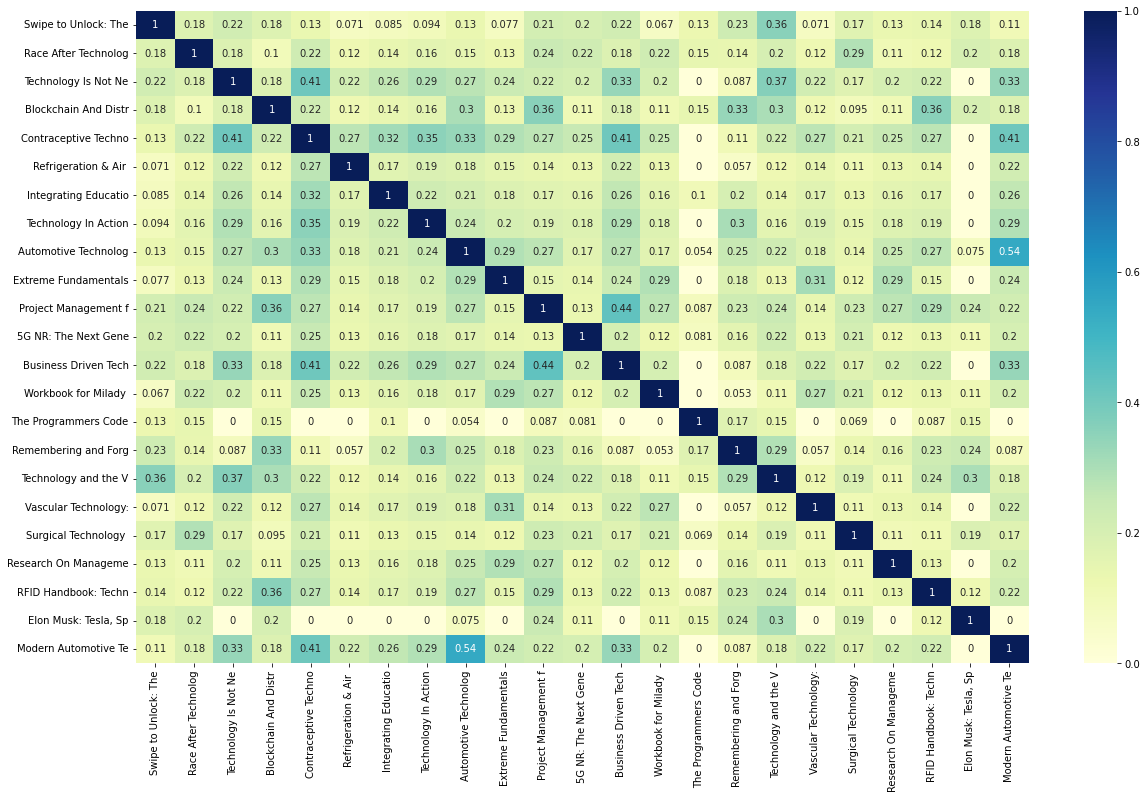

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(books)
arr = X.toarray()

create_heatmap(cosine_similarity(arr))

In [5]:
# Find top 5 highest cosine similarity score
cosine_df = pd.DataFrame(cosine_similarity(arr))
cosine_df.columns = books
cosine_df.index = books

cosine_df.values[np.tril_indices_from(cosine_df)] = np.nan
cosine_df.abs().stack().nlargest(5).rename('cosine_similarity').rename_axis(['Book1', 'Book2']).reset_index()

,Book1,Book2,cosine_similarity
0,"Automotive Technology: Principles, Diagnosis, ...",Modern Automotive Technology,0.544331
1,"Project Management for Engineering, Business a...",Business Driven Technology,0.436436
2,Technology Is Not Neutral: A Short Guide to Te...,Contraceptive Technology,0.408248
3,Contraceptive Technology,Business Driven Technology,0.408248
4,Contraceptive Technology,Modern Automotive Technology,0.408248


### Findings for Q1
The keyword I used for books search is 'Technology'.</br>
The heatmap above clearly shows that the books below have the **least similar** with the score of 0 cosine similarity with 9 other books.
>The Programmers Code: A Deep Dive Into Mastering Computer Programming Including Python, C, C++, C#, Html Coding, Raspberry Pi3, And Black Hat Hacking</br>
>Elon Musk: Tesla, SpaceX, and the Quest for a Fantastic Future</br>

The table above shows top 5 highest cosine similarity score pair. The two titles that are the **most similar** to each other are:
>Automotive Technology: Principles, Diagnosis, and Service (Halderman Automotive Series)</br>
>Modern Automotive Technology

---
##### 2. Now evaluate using a major search engine.
- Enter one of the book titles from question 1a into Google, Bing, or Yahoo!. Copy the capsule of the first organic result and the 20th organic result. Take web results only (i.e., not video results), and skip sponsored results. 
- Run the same text similarity calculation that you used for question 1b on each of these capsules in comparison to the original query (book title). 
- Which one has the highest similarity measure? 


In [6]:
book_name ='Automotive Technology: Principles, Diagnosis, and Service (Halderman Automotive Series)'
first_search = 'Automotive Technology: Principles, Diagnosis, and Service ... https://www.amazon.com › Automotive-Technology-Pr... Jim Halderman brings a world of experience, knowledge, and talent to his work. His automotive service experience includes working as a flat-rate technician, a ...'
twentieth_search = 'Principles, Diagnosis, and Service 5th Edition Direct ...https://www.directtextbook.com › isbn Automotive Technology: Principles, Diagnosis, and Service (Halderman Automotive Series) from www.directtextbook.com Find 9780133994612 Automotive Technology : Principles, Diagnosis, and Service 5th Edition by James Halderman at over 30 bookstores. Buy, rent or sell.'

searches = [book_name, first_search, twentieth_search]

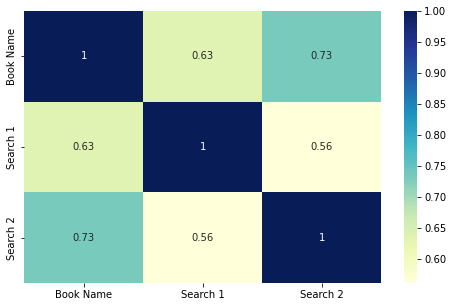

In [7]:
labels = ['Book Name', 'Search 1', 'Search 2']

def create_heatmap2(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = labels
  df.index = labels
  fig, ax = plt.subplots(figsize=(8,5))
  sns.heatmap(df, cmap=cmap, annot=True)

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(searches)
arr = X.toarray()

create_heatmap2(cosine_similarity(arr))

### Findings for Q2
The book I used for the searches is 'Automotive Technology: Principles, Diagnosis, and Service (Halderman Automotive Series)'.</br>
The 1st search result shows the cosine similarity score of 0.63 compares to the book name, while 20th search result shows the score of 0.73.  This is quite a surprise for me since I think that the first search should have shown the highest cosine similarity score. The reason behind this maybe because the 20th search capsule display the full name of the book, while the 1st search cut out the book name since it is used as a link to the url.